# Clasificación de Supernovas usando redes MLP
## usando los datos del extraidos del notebook SN_feature_extraction V2

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time
from datetime import datetime
inicio_ejecucion = time.time()

In [2]:
import pandas as pd
url_features_clean_unbalanced='https://raw.githubusercontent.com/joaquinzepeda/Datos/main/datos%20supernovas/features_clean_unbalanced.csv'
features_clean_unbalanced = pd.read_csv(url_features_clean_unbalanced, index_col=None)
features_clean_unbalanced

,delta_mag_fid_1,positive_fraction_1,delta_mag_fid_2,positive_fraction_2,Multiband_period,PPE,Period_band_1,delta_period_1,Period_band_2,delta_period_2,...,SPM_tau_fall_1_y.1,SPM_chi_1_y.1,SPM_A_2_y.1,SPM_t0_2_y.1,SPM_gamma_2_y.1,SPM_beta_2_y.1,SPM_tau_rise_2_y.1,SPM_tau_fall_2_y.1,SPM_chi_2_y.1,classALeRCE
0,2.244800,1.0,1.847730,1.0,51.630429,0.018797,0.200240,51.430189,0.069774,51.560655,...,11.688865,0.007554,0.311686,6.958040,21.231911,0.416776,3.677212,30.091547,0.594410,SNIa
1,0.495977,1.0,0.786995,1.0,0.156563,0.004384,0.165508,0.008945,0.185710,0.029147,...,24.821418,0.033287,0.114158,-5.114811,13.845734,0.063725,10.514372,20.820992,0.044529,SNIbc
2,3.293953,1.0,2.170098,1.0,1.005344,0.056146,0.065053,0.940291,999.999953,998.994608,...,22.204705,0.010855,2.067952,-22.606529,39.255637,0.755130,17.087419,46.760685,1.111489,SNIIn
3,1.371363,1.0,0.797367,1.0,1.028361,0.034738,1.029866,0.001505,37.037036,36.008675,...,14.225585,0.028317,0.257985,4.309858,18.030784,0.606824,3.959666,85.046677,0.027387,SNIa
4,0.728745,1.0,1.682007,1.0,0.117252,0.008665,0.159770,0.042518,0.183438,0.066186,...,21.426885,0.123988,0.456477,-10.767997,44.214095,0.483826,25.675861,25.166046,17.122697,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,2.981503,1.0,2.216758,1.0,104.972373,0.126945,90.909084,14.063289,142.857138,37.884766,...,24.208459,0.077253,0.287074,4.316309,14.243013,0.570416,4.845103,28.891700,0.040567,SNIa
1600,2.669654,1.0,1.719614,1.0,73.929961,0.074820,66.666664,7.263297,76.923075,2.993114,...,10.058062,0.013802,0.245710,12.105234,2.379414,0.340936,6.101452,14.828348,0.039756,SNIa
1601,1.627867,1.0,1.534458,1.0,1.016858,0.042308,999.999953,998.983094,999.999953,998.983094,...,19.974884,0.045213,0.401462,5.696664,35.855792,0.521981,3.882842,30.064385,0.056440,SNIa
1602,1.344170,1.0,2.227105,1.0,1.024148,0.016782,999.999953,998.975804,999.999953,998.975804,...,4.324015,1.353607,0.145629,4.926030,8.235378,0.014030,2.534057,19.834071,0.047055,SNIa


In [3]:
count_clase1 = pd.DataFrame({'classALeRCE':features_clean_unbalanced['classALeRCE']})
count_clase1.groupby(count_clase1.columns.tolist(),as_index=False).size()

,classALeRCE,size
0,SLSN,33
1,SNII,280
2,SNIIb,11
3,SNIIn,38
4,SNIa,1166
5,SNIbc,76


# Unión de las supernovas clase II
## Se unen las clases SNII,SNIIb,SNIIn	

In [4]:
features_clean_unbalanced['classALeRCE']= features_clean_unbalanced['classALeRCE'].replace(['SNIIb','SNIIn'],'SNII')
features_clean_unbalanced

,delta_mag_fid_1,positive_fraction_1,delta_mag_fid_2,positive_fraction_2,Multiband_period,PPE,Period_band_1,delta_period_1,Period_band_2,delta_period_2,...,SPM_tau_fall_1_y.1,SPM_chi_1_y.1,SPM_A_2_y.1,SPM_t0_2_y.1,SPM_gamma_2_y.1,SPM_beta_2_y.1,SPM_tau_rise_2_y.1,SPM_tau_fall_2_y.1,SPM_chi_2_y.1,classALeRCE
0,2.244800,1.0,1.847730,1.0,51.630429,0.018797,0.200240,51.430189,0.069774,51.560655,...,11.688865,0.007554,0.311686,6.958040,21.231911,0.416776,3.677212,30.091547,0.594410,SNIa
1,0.495977,1.0,0.786995,1.0,0.156563,0.004384,0.165508,0.008945,0.185710,0.029147,...,24.821418,0.033287,0.114158,-5.114811,13.845734,0.063725,10.514372,20.820992,0.044529,SNIbc
2,3.293953,1.0,2.170098,1.0,1.005344,0.056146,0.065053,0.940291,999.999953,998.994608,...,22.204705,0.010855,2.067952,-22.606529,39.255637,0.755130,17.087419,46.760685,1.111489,SNII
3,1.371363,1.0,0.797367,1.0,1.028361,0.034738,1.029866,0.001505,37.037036,36.008675,...,14.225585,0.028317,0.257985,4.309858,18.030784,0.606824,3.959666,85.046677,0.027387,SNIa
4,0.728745,1.0,1.682007,1.0,0.117252,0.008665,0.159770,0.042518,0.183438,0.066186,...,21.426885,0.123988,0.456477,-10.767997,44.214095,0.483826,25.675861,25.166046,17.122697,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,2.981503,1.0,2.216758,1.0,104.972373,0.126945,90.909084,14.063289,142.857138,37.884766,...,24.208459,0.077253,0.287074,4.316309,14.243013,0.570416,4.845103,28.891700,0.040567,SNIa
1600,2.669654,1.0,1.719614,1.0,73.929961,0.074820,66.666664,7.263297,76.923075,2.993114,...,10.058062,0.013802,0.245710,12.105234,2.379414,0.340936,6.101452,14.828348,0.039756,SNIa
1601,1.627867,1.0,1.534458,1.0,1.016858,0.042308,999.999953,998.983094,999.999953,998.983094,...,19.974884,0.045213,0.401462,5.696664,35.855792,0.521981,3.882842,30.064385,0.056440,SNIa
1602,1.344170,1.0,2.227105,1.0,1.024148,0.016782,999.999953,998.975804,999.999953,998.975804,...,4.324015,1.353607,0.145629,4.926030,8.235378,0.014030,2.534057,19.834071,0.047055,SNIa


In [5]:
count_clase2 = pd.DataFrame({'classALeRCE':features_clean_unbalanced['classALeRCE']})
count_clase2 = count_clase1.groupby(count_clase2.columns.tolist(),as_index=False).size()
count_clase2

,classALeRCE,size
0,SLSN,33
1,SNII,280
2,SNIIb,11
3,SNIIn,38
4,SNIa,1166
5,SNIbc,76



# Separación del conjunto en ENTRENAMIENTO y TEST:

Dividiremos el conjunto en 70% para entrenamiento y 30% para test


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # se codifica la clase
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.utils import to_categorical
le = LabelEncoder()


X, y = features_clean_unbalanced.iloc[:,:-1], features_clean_unbalanced['classALeRCE']
# label encode the target variable
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [7]:
y_sin_codificar = le.inverse_transform(y)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [9]:

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras.layers import Dropout

In [10]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [11]:
## Defining various initialization parameters for 163-80-40-4 MLP model
num_classes = 4
#num_features = X_train.shape[1]
feature_vector_length = 163
num_output = 4
num_layers_0 = 64
num_layers_1 = 64
starter_learning_rate = 0.001
regularizer_rate = 0.1


# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (163,)


In [12]:
dropout=0.5
# Create the model
model= Sequential(name='3_layer_mlp')
model.add(Dense(num_layers_0, input_shape=input_shape, activation='sigmoid'))
model.add(Dropout(dropout))
model.add(Dense(num_layers_1, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "3_layer_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                10496     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
Total params: 14,916
Trainable params: 14,916
Non-trainable params: 0
_________________________________________________________________


In [13]:

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [14]:
# Configure the model and start training
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=50, verbose=1, validation_split=0.15,callbacks=[tensorboard_callback])

Epoch 1/200
21/21 [==============================] - 2s 18ms/step - loss: 0.6660 - accuracy: 0.7740 - val_loss: 0.5699 - val_accuracy: 0.8398
Epoch 2/200
21/21 [==============================] - 0s 4ms/step - loss: 0.4661 - accuracy: 0.8640 - val_loss: 0.5340 - val_accuracy: 0.8398
Epoch 3/200
21/21 [==============================] - 0s 4ms/step - loss: 0.4353 - accuracy: 0.8689 - val_loss: 0.5152 - val_accuracy: 0.8508
Epoch 4/200
21/21 [==============================] - 0s 4ms/step - loss: 0.3998 - accuracy: 0.8679 - val_loss: 0.5688 - val_accuracy: 0.8398
Epoch 5/200
21/21 [==============================] - 0s 4ms/step - loss: 0.4049 - accuracy: 0.8640 - val_loss: 0.5311 - val_accuracy: 0.8287
Epoch 6/200
21/21 [==============================] - 0s 3ms/step - loss: 0.3831 - accuracy: 0.8777 - val_loss: 0.5185 - val_accuracy: 0.8343
Epoch 7/200
21/21 [==============================] - 0s 3ms/step - loss: 0.3573 - accuracy: 0.8787 - val_loss: 0.5447 - val_accuracy: 0.8232
Epoch 8/200


Epoch 59/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1247 - accuracy: 0.9501 - val_loss: 0.9731 - val_accuracy: 0.8343
Epoch 60/200
21/21 [==============================] - 0s 4ms/step - loss: 0.1211 - accuracy: 0.9491 - val_loss: 1.0232 - val_accuracy: 0.8287
Epoch 61/200
21/21 [==============================] - 0s 4ms/step - loss: 0.1382 - accuracy: 0.9560 - val_loss: 1.1287 - val_accuracy: 0.8343
Epoch 62/200
21/21 [==============================] - 0s 4ms/step - loss: 0.1220 - accuracy: 0.9521 - val_loss: 1.0788 - val_accuracy: 0.8453
Epoch 63/200
21/21 [==============================] - 0s 3ms/step - loss: 0.1157 - accuracy: 0.9413 - val_loss: 1.0430 - val_accuracy: 0.8343
Epoch 64/200
21/21 [==============================] - 0s 3ms/step - loss: 0.1239 - accuracy: 0.9452 - val_loss: 1.1761 - val_accuracy: 0.8287
Epoch 65/200
21/21 [==============================] - 0s 4ms/step - loss: 0.1446 - accuracy: 0.9442 - val_loss: 1.1187 - val_accuracy: 0.8398
Epoch 

21/21 [==============================] - 0s 4ms/step - loss: 0.0590 - accuracy: 0.9814 - val_loss: 1.2160 - val_accuracy: 0.8453
Epoch 117/200
21/21 [==============================] - 0s 4ms/step - loss: 0.0701 - accuracy: 0.9736 - val_loss: 1.2133 - val_accuracy: 0.8453
Epoch 118/200
21/21 [==============================] - 0s 4ms/step - loss: 0.0546 - accuracy: 0.9765 - val_loss: 1.1788 - val_accuracy: 0.8508
Epoch 119/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0659 - accuracy: 0.9706 - val_loss: 1.2491 - val_accuracy: 0.8508
Epoch 120/200
21/21 [==============================] - ETA: 0s - loss: 0.0603 - accuracy: 0.97 - 0s 6ms/step - loss: 0.0715 - accuracy: 0.9726 - val_loss: 1.1729 - val_accuracy: 0.8508
Epoch 121/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0701 - accuracy: 0.9736 - val_loss: 1.2145 - val_accuracy: 0.8508
Epoch 122/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0658 - accuracy: 0.9755 - val_loss: 1

21/21 [==============================] - 0s 5ms/step - loss: 0.0450 - accuracy: 0.9834 - val_loss: 1.4245 - val_accuracy: 0.8564
Epoch 174/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0650 - accuracy: 0.9765 - val_loss: 1.3100 - val_accuracy: 0.8453
Epoch 175/200
21/21 [==============================] - 0s 4ms/step - loss: 0.0596 - accuracy: 0.9834 - val_loss: 1.3569 - val_accuracy: 0.8398
Epoch 176/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0775 - accuracy: 0.9697 - val_loss: 1.3116 - val_accuracy: 0.8398
Epoch 177/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0588 - accuracy: 0.9765 - val_loss: 1.3846 - val_accuracy: 0.8453
Epoch 178/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0675 - accuracy: 0.9736 - val_loss: 1.3196 - val_accuracy: 0.8453
Epoch 179/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0395 - accuracy: 0.9902 - val_loss: 1.4116 - val_accuracy: 0.8508
Epoch 180/200

In [15]:
pred_labels = model.predict(X_test).argmax(axis=1) #clasificamos como la clase que tenga la mayor probabilidad

Text(33.0, 0.5, 'True Label')

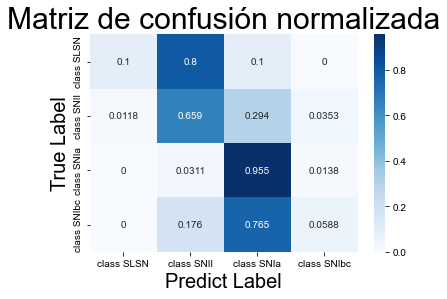

In [16]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn


columns = ['class %s' %(i) for i in np.unique(y_sin_codificar)]


confm = confusion_matrix(y_test, pred_labels,normalize='true')
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues',fmt='.3g', annot=True)
sn.set(rc={'figure.figsize':(12,8)})
ax.set_title('Matriz de confusión normalizada',fontsize=30)
ax.set_xlabel('Predict Label',fontsize=20)
ax.set_ylabel('True Label',fontsize=20)

In [17]:
# calculate accuracy
from sklearn import metrics
accuracy_0 = metrics.accuracy_score(y_test, pred_labels)*100
presicion_0 = metrics.precision_score(y_test, pred_labels,average='macro')*100
recall_0 = metrics.recall_score(y_test, pred_labels,average='macro')*100
print("Classification accuracy is %2f"%accuracy_0,"%")
print("Classification precision is %2f"%presicion_0,"%")
print("Classification recall is %2f"%recall_0,"%")

Classification accuracy is 83.291771 %
Classification precision is 55.950815 %
Classification recall is 44.316609 %


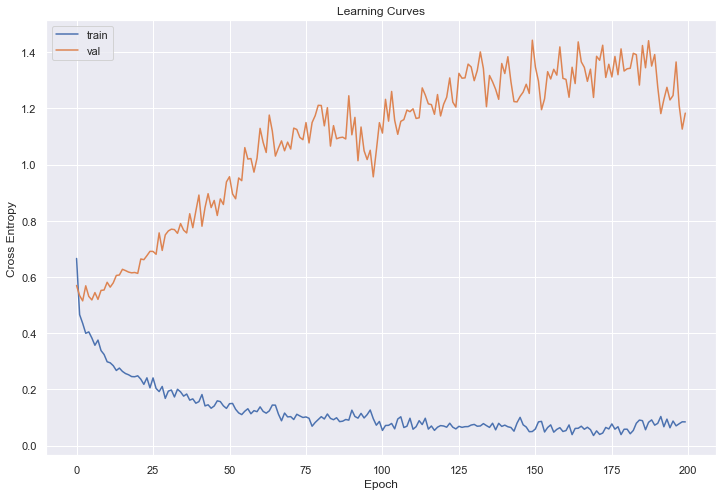

In [18]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

# Balancear los datos: Oversampling the minority class
Ojo que solo balanceamos los datos de Train

In [19]:
count_clase3 = pd.DataFrame({'y_train':y_train})
count_clase3 = count_clase3.groupby(count_clase3.columns.tolist(),as_index=False).size()
count_clase3 

,y_train,size
0,0,23
1,1,244
2,2,877
3,3,59


In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder # se codifica la clase

le = LabelEncoder()

# transform the dataset
# clase 0 : SLSN, clase 1: SNII, clase 2: SNIa,clase 3 = SNIbc
oversample = SMOTE(sampling_strategy = {0: count_clase3['size'][0]*10, 1: count_clase3['size'][1]*2, 2: count_clase3['size'][2]*1, 3: count_clase3['size'][3]*5})
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [21]:
count_clase5 = pd.DataFrame({'classALeRCE': y_train_smote})
count_clase5.groupby(count_clase5.columns.tolist(),as_index=False).size()

,classALeRCE,size
0,0,230
1,1,488
2,2,877
3,3,295


In [22]:
from sklearn.preprocessing import StandardScaler

scaler_2 = StandardScaler()
X_train_smote = scaler_2.fit_transform(X_train_smote)
X_test = scaler_2.fit_transform(X_test)

In [23]:
## Defining various initialization parameters for 163-80-40-4 MLP model
num_classes = 4
#num_features = X_train.shape[1]
feature_vector_length = 163
num_output = 4
num_layers_0 = 64
num_layers_1 = 64
starter_learning_rate = 0.001
regularizer_rate = 0.1


# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (163,)


In [24]:
dropout=0.5
# Create the model
model_smote = Sequential(name='3_layer_mlp_smote')
model_smote.add(Dense(num_layers_0, input_shape=input_shape, activation='sigmoid'))
model.add(Dropout(dropout))
model_smote.add(Dense(num_layers_1, activation='relu'))
model_smote.add(Dense(num_classes, activation='softmax'))
model_smote.summary()

Model: "3_layer_mlp_smote"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                10496     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 260       
Total params: 14,916
Trainable params: 14,916
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:

# Configure the model and start training
model_smote.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), metrics=['accuracy'])
history_smote = model_smote.fit(X_train_smote, y_train_smote, epochs=200, batch_size=50, verbose=1, validation_split=0.2,callbacks=[tensorboard_callback])

Epoch 1/200
31/31 [==============================] - 1s 30ms/step - loss: 0.6186 - accuracy: 0.7903 - val_loss: 2.2444 - val_accuracy: 0.2407
Epoch 2/200
31/31 [==============================] - 0s 4ms/step - loss: 0.4049 - accuracy: 0.8763 - val_loss: 1.6524 - val_accuracy: 0.2831
Epoch 3/200
31/31 [==============================] - 0s 4ms/step - loss: 0.3190 - accuracy: 0.9001 - val_loss: 1.9367 - val_accuracy: 0.3016
Epoch 4/200
31/31 [==============================] - 0s 4ms/step - loss: 0.2785 - accuracy: 0.9101 - val_loss: 1.1948 - val_accuracy: 0.3439
Epoch 5/200
31/31 [==============================] - 0s 4ms/step - loss: 0.2282 - accuracy: 0.9147 - val_loss: 1.1960 - val_accuracy: 0.3810
Epoch 6/200
31/31 [==============================] - 0s 4ms/step - loss: 0.2004 - accuracy: 0.9325 - val_loss: 1.6915 - val_accuracy: 0.3677
Epoch 7/200
31/31 [==============================] - 0s 4ms/step - loss: 0.1695 - accuracy: 0.9405 - val_loss: 0.8519 - val_accuracy: 0.6455
Epoch 8/200


Epoch 58/200
31/31 [==============================] - 0s 4ms/step - loss: 1.0048e-04 - accuracy: 1.0000 - val_loss: 0.0522 - val_accuracy: 0.9841
Epoch 59/200
31/31 [==============================] - 0s 4ms/step - loss: 9.7083e-05 - accuracy: 1.0000 - val_loss: 0.0513 - val_accuracy: 0.9841
Epoch 60/200
31/31 [==============================] - 0s 4ms/step - loss: 9.3633e-05 - accuracy: 1.0000 - val_loss: 0.0521 - val_accuracy: 0.9841
Epoch 61/200
31/31 [==============================] - 0s 4ms/step - loss: 9.0665e-05 - accuracy: 1.0000 - val_loss: 0.0514 - val_accuracy: 0.9841
Epoch 62/200
31/31 [==============================] - 0s 4ms/step - loss: 8.7705e-05 - accuracy: 1.0000 - val_loss: 0.0529 - val_accuracy: 0.9841
Epoch 63/200
31/31 [==============================] - 0s 5ms/step - loss: 8.4772e-05 - accuracy: 1.0000 - val_loss: 0.0507 - val_accuracy: 0.9841
Epoch 64/200
31/31 [==============================] - 0s 5ms/step - loss: 8.1983e-05 - accuracy: 1.0000 - val_loss: 0.0509 -

31/31 [==============================] - 0s 4ms/step - loss: 2.2186e-05 - accuracy: 1.0000 - val_loss: 0.0469 - val_accuracy: 0.9894
Epoch 115/200
31/31 [==============================] - 0s 4ms/step - loss: 2.1739e-05 - accuracy: 1.0000 - val_loss: 0.0480 - val_accuracy: 0.9868
Epoch 116/200
31/31 [==============================] - 0s 4ms/step - loss: 2.1215e-05 - accuracy: 1.0000 - val_loss: 0.0477 - val_accuracy: 0.9868
Epoch 117/200
31/31 [==============================] - 0s 4ms/step - loss: 2.0814e-05 - accuracy: 1.0000 - val_loss: 0.0483 - val_accuracy: 0.9868
Epoch 118/200
31/31 [==============================] - 0s 4ms/step - loss: 2.0293e-05 - accuracy: 1.0000 - val_loss: 0.0469 - val_accuracy: 0.9894
Epoch 119/200
31/31 [==============================] - 0s 4ms/step - loss: 1.9806e-05 - accuracy: 1.0000 - val_loss: 0.0471 - val_accuracy: 0.9894
Epoch 120/200
31/31 [==============================] - 0s 4ms/step - loss: 1.9438e-05 - accuracy: 1.0000 - val_loss: 0.0479 - val_ac

31/31 [==============================] - 0s 4ms/step - loss: 7.0474e-06 - accuracy: 1.0000 - val_loss: 0.0478 - val_accuracy: 0.9894
Epoch 170/200
31/31 [==============================] - 0s 4ms/step - loss: 6.8891e-06 - accuracy: 1.0000 - val_loss: 0.0477 - val_accuracy: 0.9894
Epoch 171/200
31/31 [==============================] - 0s 4ms/step - loss: 6.7608e-06 - accuracy: 1.0000 - val_loss: 0.0478 - val_accuracy: 0.9894
Epoch 172/200
31/31 [==============================] - 0s 4ms/step - loss: 6.6273e-06 - accuracy: 1.0000 - val_loss: 0.0480 - val_accuracy: 0.9894
Epoch 173/200
31/31 [==============================] - 0s 4ms/step - loss: 6.5076e-06 - accuracy: 1.0000 - val_loss: 0.0478 - val_accuracy: 0.9894
Epoch 174/200
31/31 [==============================] - 0s 4ms/step - loss: 6.3765e-06 - accuracy: 1.0000 - val_loss: 0.0484 - val_accuracy: 0.9894
Epoch 175/200
31/31 [==============================] - 0s 4ms/step - loss: 6.2524e-06 - accuracy: 1.0000 - val_loss: 0.0479 - val_ac

In [27]:
pred_labels_smote = model_smote.predict(X_test).argmax(axis=1) #clasificamos como la clase que tenga la mayor probabilidad

Text(84.5, 0.5, 'True Label')

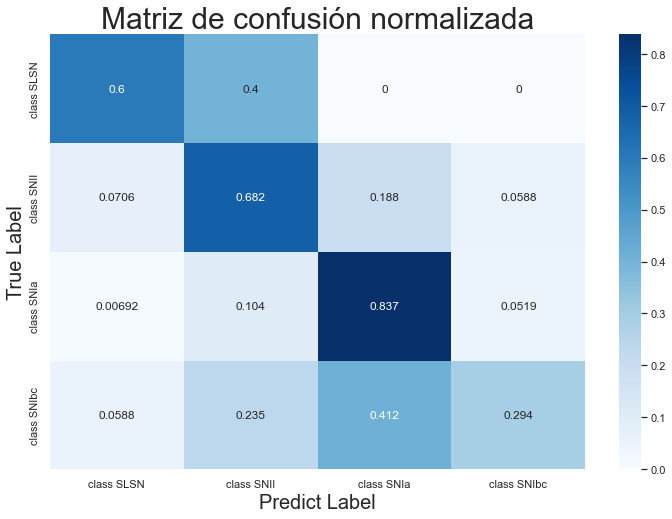

In [28]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

columns = ['class %s' %(i) for i in np.unique(y_sin_codificar)]

confm = confusion_matrix(y_test, pred_labels_smote,normalize='true')
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues',fmt='.3g', annot=True)
sn.set(rc={'figure.figsize':(12,8)})
ax.set_title('Matriz de confusión normalizada',fontsize=30)
ax.set_xlabel('Predict Label',fontsize=20)
ax.set_ylabel('True Label',fontsize=20)

In [29]:
# calculate accuracy
from sklearn import metrics
accuracy_1 = metrics.accuracy_score(y_test, pred_labels_smote)*100
presicion_1 = metrics.precision_score(y_test, pred_labels_smote,average='macro')*100
recall_1 = metrics.recall_score(y_test, pred_labels_smote,average='macro')*100
print("Classification accuracy is %2f"%accuracy_1,"%")
print("Classification precision is %2f"%presicion_1,"%")
print("Classification recall is %2f"%recall_1,"%")

Classification accuracy is 77.556110 %
Classification precision is 52.934355 %
Classification recall is 60.346021 %


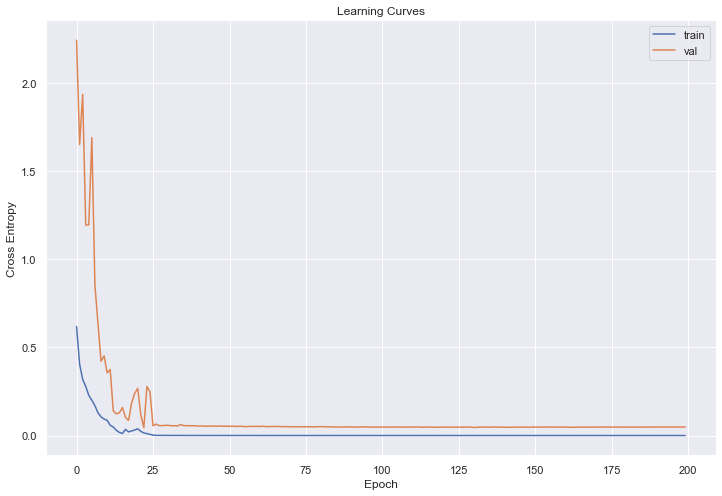

In [30]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history_smote.history['loss'], label='train')
plt.plot(history_smote.history['val_loss'], label='val')
plt.legend()

In [31]:
# Guardar el Modelo
model_smote.save('model_smote_3.h5')

In [35]:
# Recrea exactamente el mismo modelo solo desde el archivo
loaded_model = tf.keras.models.load_model('model_smote.h5')
pred_labels_loaded = loaded_model.predict(X_test).argmax(axis=1) #clasificamos como la clase que tenga la mayor probabilidad

# calculate accuracy
from sklearn import metrics
accuracy_l = metrics.accuracy_score(y_test, pred_labels_loaded)*100
presicion_l = metrics.precision_score(y_test, pred_labels_loaded,average='macro')*100
recall_l = metrics.recall_score(y_test, pred_labels_loaded,average='macro')*100
print("Classification accuracy is %2f"%accuracy_l,"%")
print("Classification precision is %2f"%presicion_l,"%")
print("Classification recall is %2f"%recall_l,"%")

Classification accuracy is 78.553616 %
Classification precision is 54.055835 %
Classification recall is 64.351211 %


In [38]:
#!tensorboard --logdir logs/fit
#http://localhost:6006/

In [36]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir logs/fit (started 0:10:03 ago; pid 12608)
  - port 6006: logdir logs/fit (started 0:05:12 ago; pid 16896)
  - port 6006: logdir logs/fit (started 0:10:10 ago; pid 17516)
  - port 6006: logdir logs/fit (started 0:10:57 ago; pid 19312)
  - port 6006: logdir logs/fit (started 0:08:24 ago; pid 9040)


In [37]:
# Control TensorBoard display. If no port is provided, 
# the most recently launched TensorBoard is used
notebook.display(port=6006, height=1000)

Selecting TensorBoard with logdir logs/fit (started 0:05:15 ago; port 6006, pid 16896).
